# Import library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer


# Select column and See data

In [24]:
df = pd.read_csv("laptop_prices.csv")
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


# Distribution

In [26]:
df = df.select_dtypes(include='float64')

Text(0.5, 1.0, 'Price')

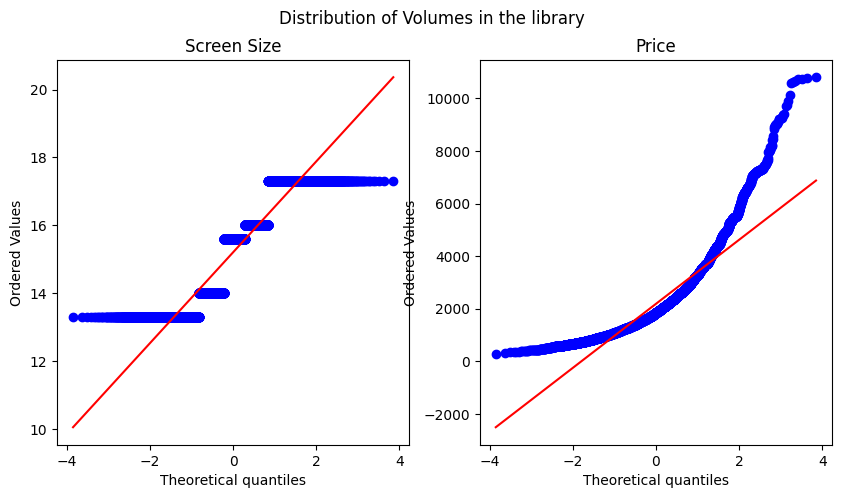

In [27]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

stats.probplot(df['Screen Size (inch)'],  dist="norm", plot=axes[0])
axes[0].set_title("Screen Size")

stats.probplot(df['Price ($)'], dist="norm", plot=axes[1])
axes[1].set_title("Price")

<Axes: xlabel='Screen Size (inch)', ylabel='Density'>

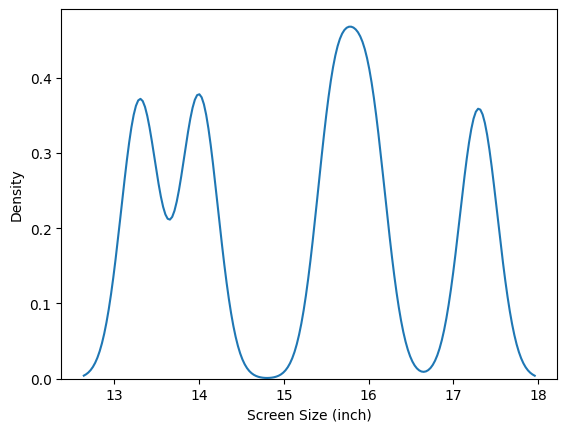

In [28]:
sns.kdeplot(df['Screen Size (inch)'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Screen Size (inch)    11768 non-null  float64
 1   Battery Life (hours)  11768 non-null  float64
 2   Weight (kg)           11768 non-null  float64
 3   Price ($)             11768 non-null  float64
dtypes: float64(4)
memory usage: 367.9 KB


<Axes: xlabel='Battery Life (hours)', ylabel='Density'>

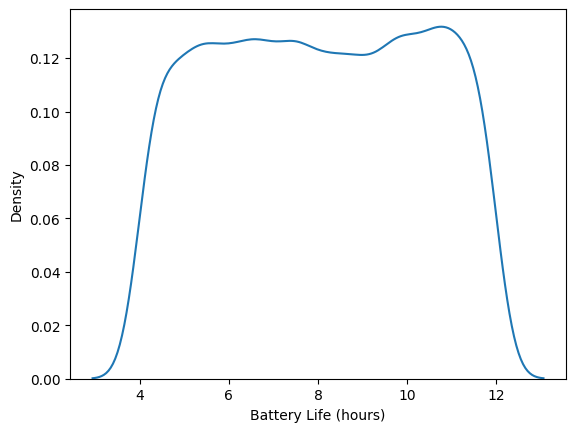

In [30]:
sns.kdeplot(df['Battery Life (hours)'])

<Axes: xlabel='Weight (kg)', ylabel='Density'>

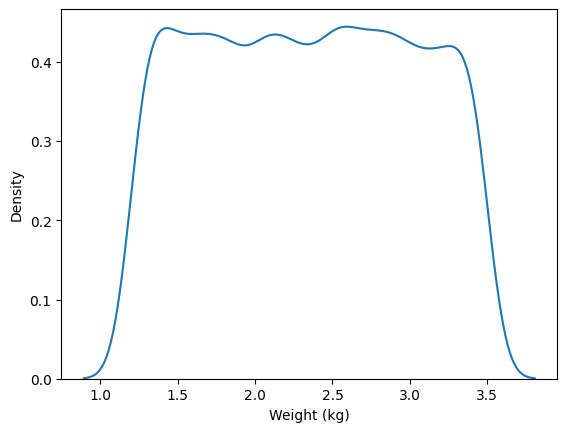

In [31]:
sns.kdeplot(df['Weight (kg)'])

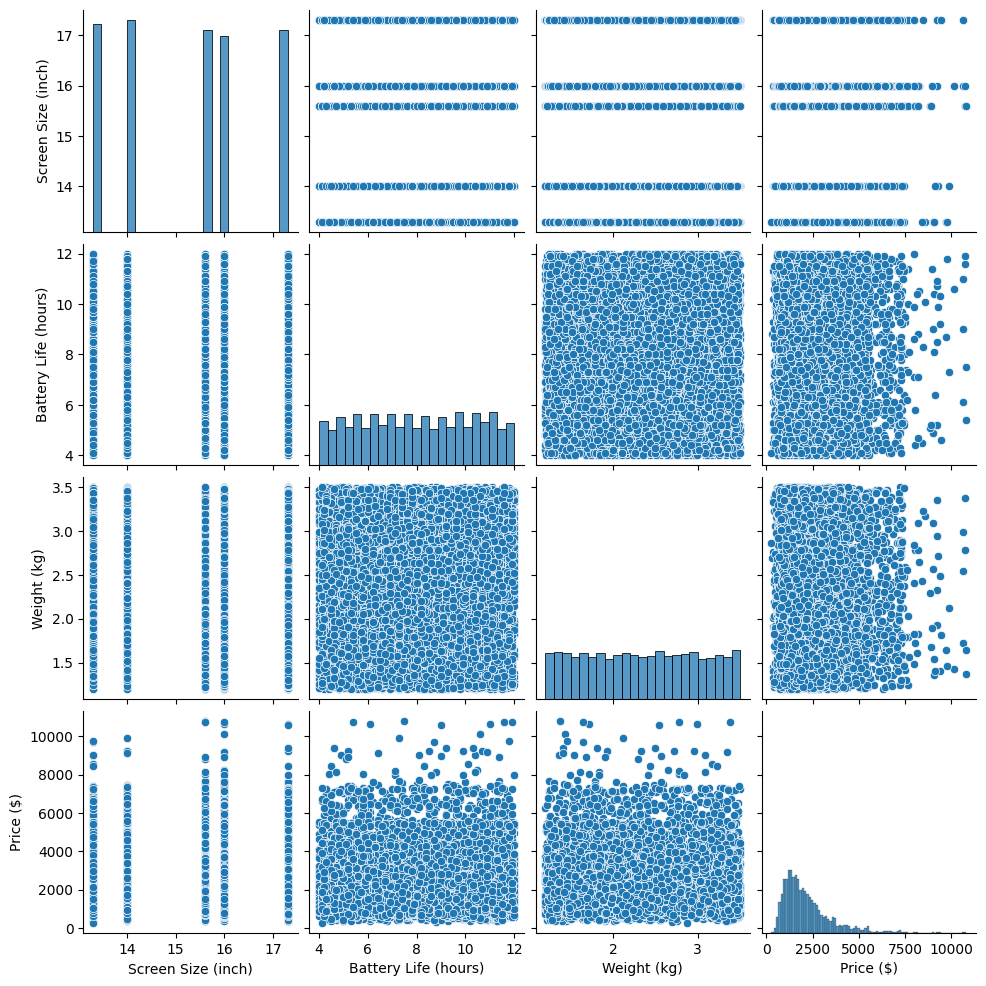

In [32]:
sns.pairplot(df)

# Train Test Split

In [33]:
df.head(5)

,Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
0,17.3,8.9,1.42,3997.07
1,14.0,9.4,2.57,1355.78
2,13.3,8.5,1.74,2673.07
3,13.3,10.5,3.10,751.17
4,16.0,5.7,3.38,2059.83


In [34]:
X = df.drop('Price ($)', axis=1)
y = df.iloc[:, -1]

In [35]:
X

,Screen Size (inch),Battery Life (hours),Weight (kg)
0,17.3,8.9,1.42
1,14.0,9.4,2.57
2,13.3,8.5,1.74
3,13.3,10.5,3.10
4,16.0,5.7,3.38
...,...,...,...
11763,17.3,11.5,1.58
11764,16.0,9.5,2.14
11765,15.6,8.2,2.05
11766,13.3,7.5,1.48


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape, y_test.shape

((9414, 3), (2354,))

# Apply Power Transformer on Screen Size

In [38]:
df['Screen Size (inch)']

0        17.3
1        14.0
2        13.3
3        13.3
4        16.0
         ... 
11763    17.3
11764    16.0
11765    15.6
11766    13.3
11767    17.3
Name: Screen Size (inch), Length: 11768, dtype: float64

In [39]:
df['Screen Size (inch)'].skew()

np.float64(0.038001696022622024)

<Axes: xlabel='Screen Size (inch)', ylabel='Density'>

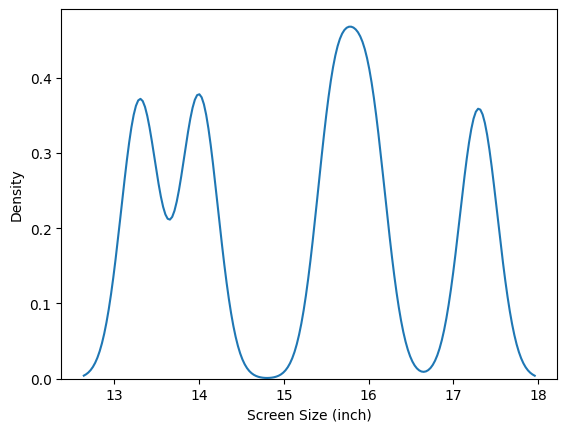

In [40]:
sns.kdeplot(df['Screen Size (inch)'])

# Box-Cox transformer

In [41]:
box_cox = PowerTransformer(method='box-cox') #default yeo-johnson
X_train_transformed = box_cox.fit_transform(X_train+0.0001) #for ignore 0 value
X_test_transformed = box_cox.transform(X_test+0.0001) 

box_cox.lambdas_

array([0.44718282, 0.76876658, 0.74258735])

### make a new dataframe with this lambda's value

In [59]:
dx = {
    'Col_Name': X_train.columns.tolist(),
    'Box_Cox_Lambda': box_cox.lambdas_
}
bcx_transformed_df = pd.DataFrame(dx)
bcx_transformed_df

,Col_Name,Box_Cox_Lambda
0,Screen Size (inch),0.447183
1,Battery Life (hours),0.768767
2,Weight (kg),0.742587


In [43]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

In [44]:
X_train_transformed

,Screen Size (inch),Battery Life (hours),Weight (kg)
0,-1.354780,1.268470,-0.591982
1,-1.354780,0.284113,1.130833
2,0.560894,-0.451919,0.796500
3,-1.354780,-1.569270,0.880737
4,0.560894,0.865057,0.281084
...,...,...,...
9409,0.289028,-1.279174,0.936647
9410,-0.838908,1.188490,-1.761637
9411,-1.354780,1.148372,0.754212
9412,-0.838908,-0.187813,1.089415


## On `Screen Size (inch)`

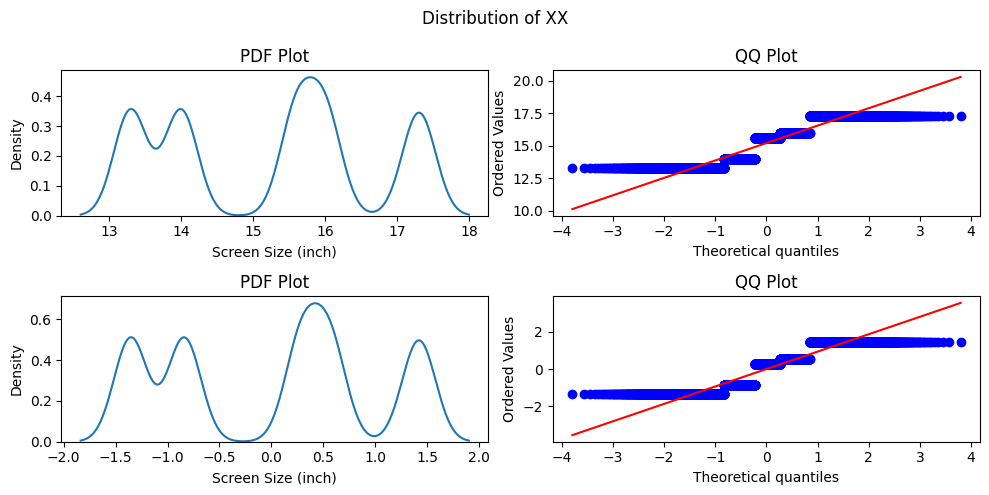

In [45]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of XX')

sns.kdeplot(X_train['Screen Size (inch)'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot')

stats.probplot(X_train['Screen Size (inch)'], dist="norm", plot=axes[0, 1]) # Change is here
axes[0, 1].set_title('QQ Plot')

sns.kdeplot(X_train_transformed['Screen Size (inch)'], ax=axes[1, 0])
axes[1, 0].set_title('PDF Plot')

stats.probplot(X_train_transformed['Screen Size (inch)'], dist="norm", plot=axes[1, 1]) # Change is here
axes[1, 1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [46]:
X_train['Screen Size (inch)'].skew(), X_train_transformed['Screen Size (inch)'].skew()

(np.float64(0.029891379248517137), np.float64(-0.019563487272993566))

## On `Battery Life (hours)`

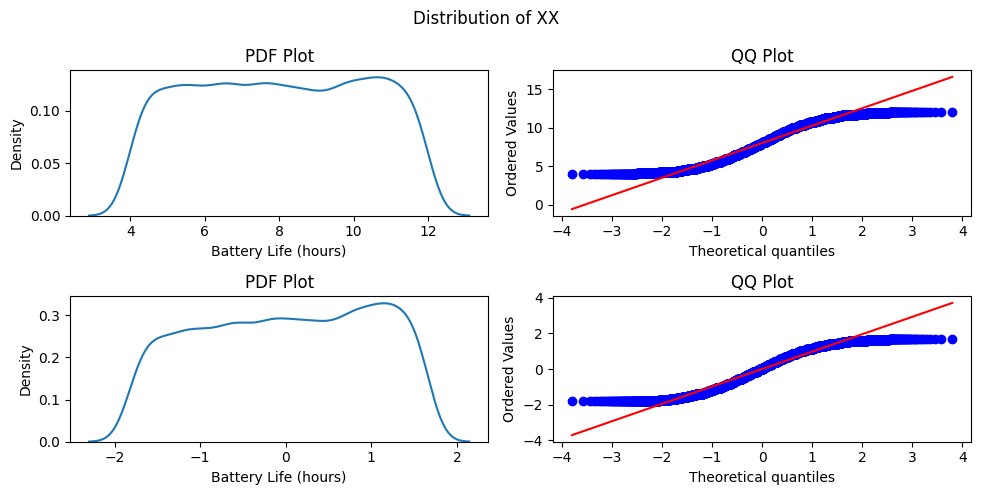

In [47]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of XX')

sns.kdeplot(X_train['Battery Life (hours)'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot')

stats.probplot(X_train['Battery Life (hours)'], dist="norm", plot=axes[0, 1]) # Change is here
axes[0, 1].set_title('QQ Plot')

sns.kdeplot(X_train_transformed['Battery Life (hours)'], ax=axes[1, 0])
axes[1, 0].set_title('PDF Plot')

stats.probplot(X_train_transformed['Battery Life (hours)'], dist="norm", plot=axes[1, 1]) # Change is here
axes[1, 1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [48]:
X_train['Battery Life (hours)'].skew(), X_train_transformed['Battery Life (hours)'].skew()

(np.float64(-0.011810956682112381), np.float64(-0.09543070164036246))

## On `Weight (kg)`

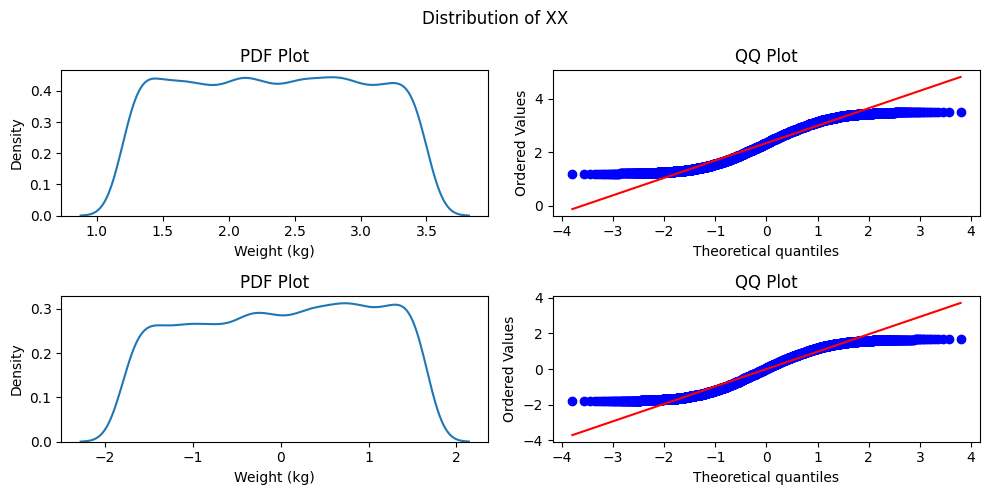

In [49]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of XX')

sns.kdeplot(X_train['Weight (kg)'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot')

stats.probplot(X_train['Weight (kg)'], dist="norm", plot=axes[0, 1]) # Change is here
axes[0, 1].set_title('QQ Plot')

sns.kdeplot(X_train_transformed['Weight (kg)'], ax=axes[1, 0])
axes[1, 0].set_title('PDF Plot')

stats.probplot(X_train_transformed['Weight (kg)'], dist="norm", plot=axes[1, 1]) # Change is here
axes[1, 1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [50]:
X_train['Weight (kg)'].skew(), X_train_transformed['Weight (kg)'].skew()

(np.float64(0.0011349906045867505), np.float64(-0.09082352129950992))

# Yeo-Johnson Transformer

## Create object of yeo-johnson

In [53]:
yeo_johnson = PowerTransformer(method='yeo-johnson')
X_train_transformed_yeo = yeo_johnson.fit_transform(X_train)
X_test_transformed_yeo = yeo_johnson.transform(X_test)

yeo_johnson.lambdas_

array([0.432932  , 0.77272001, 0.7432649 ])

## Make a new dataframe

In [54]:
dx = {
    'Col_Name': X_train.columns.tolist(),
    'johnson_lambdas': yeo_johnson.lambdas_
}

In [55]:
johnson_transformed_df = pd.DataFrame(dx)
johnson_transformed_df

,Col_Name,johnson_lambdas
0,Screen Size (inch),0.432932
1,Battery Life (hours),0.772720
2,Weight (kg),0.743265


In [57]:
X_train_transformed_yeo = pd.DataFrame(X_test_transformed_yeo, columns=X_train.columns.tolist())
X_train_transformed_yeo

,Screen Size (inch),Battery Life (hours),Weight (kg)
0,-0.839269,-0.815234,0.138263
1,-0.839269,0.280339,1.036843
2,1.420397,-0.952161,-0.025375
3,1.420397,1.312157,-1.651796
4,1.420397,0.905869,-0.617276
...,...,...,...
2349,-1.353960,-0.192558,-0.463668
2350,0.288152,1.231530,0.965760
2351,1.420397,-0.589898,-0.402592
2352,-0.839269,-0.952161,0.359247


# See Distribution

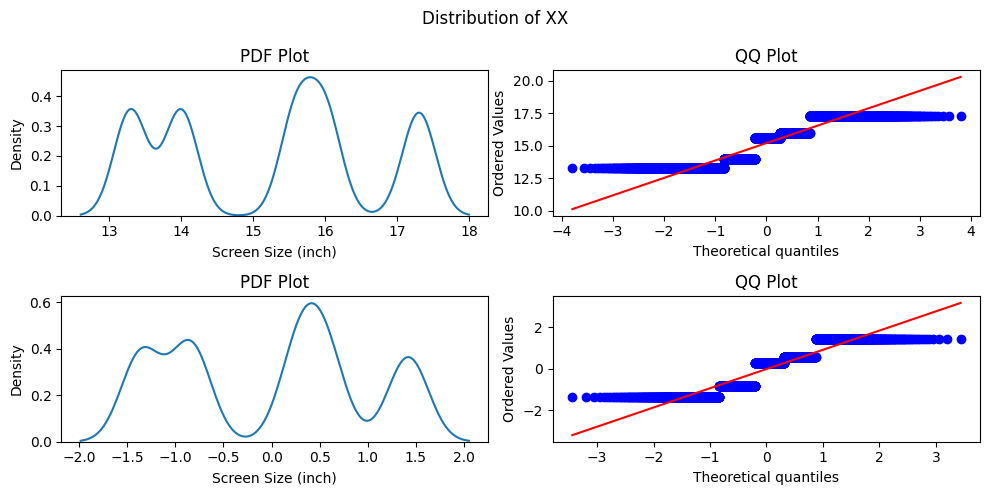

In [58]:
figure, axes = plt.subplots(2, 2, figsize=(10, 5))
figure.suptitle('Distribution of XX')

sns.kdeplot(X_train['Screen Size (inch)'], ax=axes[0, 0])
axes[0, 0].set_title('PDF Plot')

stats.probplot(X_train['Screen Size (inch)'], dist="norm", plot=axes[0, 1]) # Change is here
axes[0, 1].set_title('QQ Plot')

sns.kdeplot(X_train_transformed_yeo['Screen Size (inch)'], ax=axes[1, 0])
axes[1, 0].set_title('PDF Plot')

stats.probplot(X_train_transformed_yeo['Screen Size (inch)'], dist="norm", plot=axes[1, 1]) # Change is here
axes[1, 1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

In [52]:
X_train.head(5)

,Screen Size (inch),Battery Life (hours),Weight (kg)
957,13.3,11.0,1.93
6950,13.3,8.6,3.11
6186,16.0,6.9,2.87
10719,13.3,4.5,2.93
3592,16.0,10.0,2.51


# Compare these Method

In [61]:
bcx_transformed_df

,Col_Name,Box_Cox_Lambda
0,Screen Size (inch),0.447183
1,Battery Life (hours),0.768767
2,Weight (kg),0.742587


In [62]:
johnson_transformed_df

,Col_Name,johnson_lambdas
0,Screen Size (inch),0.432932
1,Battery Life (hours),0.772720
2,Weight (kg),0.743265


In [75]:
merged_df = pd.merge(bcx_transformed_df, johnson_transformed_df, on='Col_Name')
merged_df

,Col_Name,Box_Cox_Lambda,johnson_lambdas
0,Screen Size (inch),0.447183,0.432932
1,Battery Life (hours),0.768767,0.772720
2,Weight (kg),0.742587,0.743265


Text(0.5, 1.0, 'Yeo-Johnson')

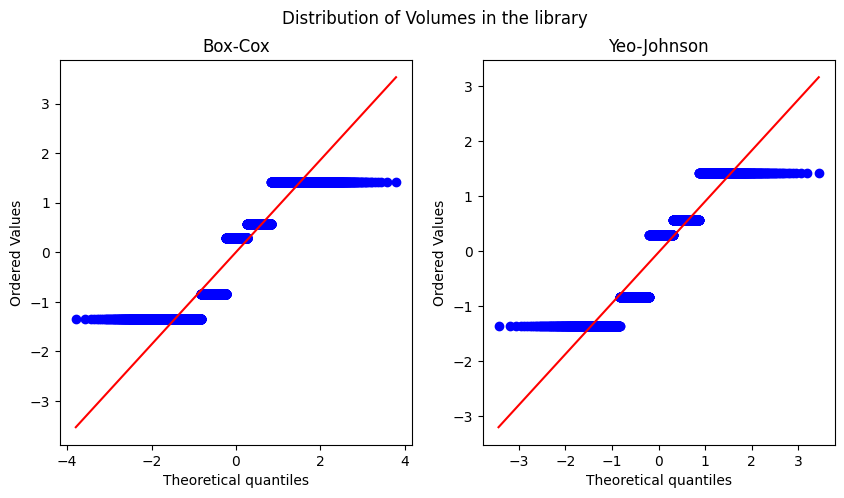

In [78]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5))
figure.suptitle('Distribution of Volumes in the library')

stats.probplot(X_train_transformed['Screen Size (inch)'],  dist="norm", plot=axes[0])
axes[0].set_title("Box-Cox")

stats.probplot(X_train_transformed_yeo['Screen Size (inch)'], dist="norm", plot=axes[1])
axes[1].set_title("Yeo-Johnson")